In [1]:
from __future__ import division
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import glob

In [1]:
#Compare Networks trained with variables included indo Dense layers

In [23]:
data_t11m = np.load('/fastio2/dasha/double_pulse/data_11vars_mid_NuTau_1_1_1.npy', mmap_mode="r")
data_m11m = np.load('/fastio2/dasha/double_pulse/data_11vars_mid_NuMu_1_1_1.npy', mmap_mode="r")
data_e11m = np.load('/fastio2/dasha/double_pulse/data_11vars_mid_NuE_1_1_1.npy', mmap_mode="r")
data_t11 = np.load('/fastio2/dasha/double_pulse/data_11vars_NuTau_1_1_1.npy', mmap_mode="r")
data_m11 = np.load('/fastio2/dasha/double_pulse/data_11vars_NuMu_1_1_1.npy', mmap_mode="r")
data_e11 = np.load('/fastio2/dasha/double_pulse/data_11vars_NuE_1_1_1.npy', mmap_mode="r")
data_t6 = np.load('/fastio2/dasha/double_pulse/data_6vars_NuTau_1_1_1.npy', mmap_mode="r")
data_m6 = np.load('/fastio2/dasha/double_pulse/data_6vars_NuMu_1_1_1.npy', mmap_mode="r")
data_e6 = np.load('/fastio2/dasha/double_pulse/data_6vars_NuE_1_1_1.npy', mmap_mode="r")
data_t1 = np.load('/fastio2/dasha/double_pulse/data_1vars_NuTau_1_1_1.npy', mmap_mode="r")
data_m1 = np.load('/fastio2/dasha/double_pulse/data_1vars_NuMu_1_1_1.npy', mmap_mode="r")
data_e1 = np.load('/fastio2/dasha/double_pulse/data_1vars_NuE_1_1_1.npy', mmap_mode="r")

In [3]:
def PlotO(Name,Label,data_tc,data_mc,data_ec,xscale='linear',b =200,r =[0,1], loc = 8):
    fig = plt.figure(figsize=(20, 10),facecolor ='w')
    ax = fig.add_subplot(111)
    plt.rcParams.update({'font.size': 16})
    plt.ticklabel_format(axis='both', style='sci', scilimits=(-5,5))
    ax.set_xscale(xscale)
    ax.set_yscale('log')
    ax.set_title(Name, fontsize = 16)
    ax.text(0.01,0.95,'#NuTauCC '+str(len(data_tc)), transform=ax.transAxes, color = "black",fontsize=12)
    ax.text(0.01,0.92,'#NuMuCC '+str(len(data_mc)), transform=ax.transAxes, color = "black",fontsize=12)
    ax.text(0.01,0.89,'#NuECC '+str(len(data_ec)), transform=ax.transAxes, color = "black",fontsize=12)
    ax.set_ylim(10**(-2),10**(5))
    ax.set_xlabel(Label, fontsize = 16)                                                              
    ax.set_ylabel("#Events", fontsize = 16)                                                   
    ax.hist(data_tc, bins =b, histtype = 'step',edgecolor ='r', lw =2, range =r, label = "NuTauCC")  
    ax.hist(data_mc, bins =b, histtype = 'step',edgecolor ='b', lw =2, range = r, label = "NuMuCC")  
    ax.hist(data_ec, bins =b, histtype = 'step',edgecolor ='g', lw =2, range = r, label = "NuECC")  
    
    plt.legend(loc=loc)
    plt.show()

def PlotWO(Name,Label,data_tc,data_mc,data_ec,\
         weight_tc,weight_mc,weight_ec,\
         xscale='linear',b =200,r =[0,1], loc =8):
    fig = plt.figure(figsize=(20, 10),facecolor ='w')
    ax = fig.add_subplot(111)
    plt.rcParams.update({'font.size': 16})
    plt.ticklabel_format(axis='both', style='sci', scilimits=(-5,5))
    ax.set_xscale(xscale)
    ax.set_yscale('log')
    ax.set_title(Name, fontsize = 16)
    ax.text(0.01,0.95,'#NuTauCC '+str(len(data_tc)), transform=ax.transAxes, color = "black",fontsize=12)
    ax.text(0.01,0.92,'#NuMuCC '+str(len(data_mc)), transform=ax.transAxes, color = "black",fontsize=12)
    ax.text(0.01,0.89,'#NuECC '+str(len(data_ec)), transform=ax.transAxes, color = "black",fontsize=12)
    ax.set_ylim(10**(-5),10**(2))
    
    ax.set_xlabel(Label, fontsize = 16)                                                              
    ax.set_ylabel("#Events", fontsize = 16)                                                   
    ax.hist(data_tc, bins =b, weights = weight_tc, histtype = 'step',edgecolor ='r', lw =2, range =r, label = "NuTauCC")  
    ax.hist(data_mc, bins =b, weights = weight_mc, histtype = 'step',edgecolor ='b', lw =2, range = r, label = "NuMuCC")  
    ax.hist(data_ec, bins =b, weights = weight_ec, histtype = 'step',edgecolor ='g', lw =2, range = r, label = "NuECC")  
    
    plt.legend(loc=loc)

In [10]:
def GetRates(Name,data_t,data_m,data_e,cut1,cut2,net1,net2,sign1,sign2):
    
    if (sign1 == "more") and (sign1 == "more"):
        mask_t = (data_t['preds'][net1] >= cut1) & (data_t['preds'][net2] >= cut2)
        mask_m = (data_m['preds'][net1] >= cut1) & (data_m['preds'][net2] >= cut2)
        mask_e = (data_e['preds'][net1] >= cut1) & (data_e['preds'][net2] >= cut2)
    elif (sign1 == "more"):
        mask_t = (data_t['preds'][net1] >= cut1) & (data_t['preds'][net2] <= cut2)
        mask_m = (data_m['preds'][net1] >= cut1) & (data_m['preds'][net2] <= cut2)
        mask_e = (data_e['preds'][net1] >= cut1) & (data_e['preds'][net2] <= cut2)
    elif (sign2 == "more"):
        mask_t = (data_t['preds'][net1] <= cut1) & (data_t['preds'][net2] >= cut2)
        mask_m = (data_m['preds'][net1] <= cut1) & (data_m['preds'][net2] >= cut2)
        mask_e = (data_e['preds'][net1] <= cut1) & (data_e['preds'][net2] >= cut2)
     
    else:
        mask_t = (data_t['preds'][net1] <= cut1) & (data_t['preds'][net2] <= cut2)
        mask_m = (data_m['preds'][net1] <= cut1) & (data_m['preds'][net2] <= cut2)
        mask_e = (data_e['preds'][net1] <= cut1) & (data_e['preds'][net2] <= cut2)
       

    rate_t = np.sum(data_t['weight_val'][mask_t]) 
    rate_m = np.sum(data_m['weight_val'][mask_m]) 
    rate_e = np.sum(data_e['weight_val'][mask_e])
   
    rate_t_err = np.sqrt(np.sum(np.square(data_t['weight_val'][mask_t]))) 
    rate_m_err = np.sqrt(np.sum(np.square(data_m['weight_val'][mask_m])))
    rate_e_err = np.sqrt(np.sum(np.square(data_e['weight_val'][mask_e])))
    
    print(Name)
  
    print("NuTauCC = {0:.3f} +/- {1:.3f}".format(rate_t,rate_t_err))
    print("NuMuCC =  {0:.3f} +/- {1:.3f}".format(rate_m,rate_m_err))
    print("NuECC =   {0:.3f} +/- {1:.3f}".format(rate_e,rate_e_err))
 


In [18]:
def GetRatesCut(Name,data_t,data_m,data_e,cut1,cut2,net1,net2,sign1,sign2,mask1,mask2,mask3):
    
    if (sign1 == "more") and (sign1 == "more"):
        mask_t = (data_t['preds'][net1] >= cut1) & (data_t['preds'][net2] >= cut2) & mask1
        mask_m = (data_m['preds'][net1] >= cut1) & (data_m['preds'][net2] >= cut2) & mask2
        mask_e = (data_e['preds'][net1] >= cut1) & (data_e['preds'][net2] >= cut2) & mask3
    elif (sign1 == "more"):
        mask_t = (data_t['preds'][net1] >= cut1) & (data_t['preds'][net2] <= cut2) & mask1
        mask_m = (data_m['preds'][net1] >= cut1) & (data_m['preds'][net2] <= cut2) & mask2
        mask_e = (data_e['preds'][net1] >= cut1) & (data_e['preds'][net2] <= cut2) & mask3
    elif (sign2 == "more"):
        mask_t = (data_t['preds'][net1] <= cut1) & (data_t['preds'][net2] >= cut2) & mask1
        mask_m = (data_m['preds'][net1] <= cut1) & (data_m['preds'][net2] >= cut2) & mask2
        mask_e = (data_e['preds'][net1] <= cut1) & (data_e['preds'][net2] >= cut2) & mask3
     
    else:
        mask_t = (data_t['preds'][net1] <= cut1) & (data_t['preds'][net2] <= cut2) & mask1
        mask_m = (data_m['preds'][net1] <= cut1) & (data_m['preds'][net2] <= cut2) & mask2
        mask_e = (data_e['preds'][net1] <= cut1) & (data_e['preds'][net2] <= cut2) & mask3
       

    rate_t = np.sum(data_t['weight_val'][mask_t]) 
    rate_m = np.sum(data_m['weight_val'][mask_m]) 
    rate_e = np.sum(data_e['weight_val'][mask_e])
   
    rate_t_err = np.sqrt(np.sum(np.square(data_t['weight_val'][mask_t]))) 
    rate_m_err = np.sqrt(np.sum(np.square(data_m['weight_val'][mask_m])))
    rate_e_err = np.sqrt(np.sum(np.square(data_e['weight_val'][mask_e])))
    
    print(Name)
  
    print("NuTauCC = {0:.3f} +/- {1:.3f}".format(rate_t,rate_t_err))
    print("NuMuCC =  {0:.3f} +/- {1:.3f}".format(rate_m,rate_m_err))
    print("NuECC =   {0:.3f} +/- {1:.3f}".format(rate_e,rate_e_err))
 

In [13]:
GetRates("Rates after NET1 and NET3",data_t11m,data_m11m,data_e11m,0.99,0.7,"n1","n4","more","more")
GetRates("Rates after NET1 and NET 11 MID",data_t11m,data_m11m,data_e11m,0.99,0.68,"n1","n5","more","more")
GetRates("Rates after NET1 and NET 11 MID",data_t11m,data_m11m,data_e11m,0.99,0.7,"n1","n6","more","more")
GetRates("Rates after NET1 and NET 11 MID",data_t11m,data_m11m,data_e11m,0.99,0.64,"n1","n7","more","more")

Rates after NET1 and NET3
NuTauCC = 0.995 +/- 0.055
NuMuCC =  0.156 +/- 0.025
NuECC =   0.023 +/- 0.008
Rates after NET1 and NET 11 MID
NuTauCC = 0.993 +/- 0.055
NuMuCC =  0.067 +/- 0.012
NuECC =   0.024 +/- 0.008
Rates after NET1 and NET 11 MID
NuTauCC = 0.997 +/- 0.055
NuMuCC =  0.111 +/- 0.021
NuECC =   0.021 +/- 0.007
Rates after NET1 and NET 11 MID
NuTauCC = 0.989 +/- 0.055
NuMuCC =  0.102 +/- 0.019
NuECC =   0.024 +/- 0.008


In [51]:
GetRates("Rates after NET1 and NET3",data_t11,data_m11,data_e11m,0.99,0.7,"n1","n4","more","more")
GetRates("Rates after NET1 and NET 11",data_t11,data_m11,data_e11,0.99,0.68,"n1","n5","more","more")
GetRates("Rates after NET1 and NET 11",data_t11,data_m11,data_e11,0.99,0.65,"n1","n6","more","more")
GetRates("Rates after NET1 and NET 11",data_t11,data_m11,data_e11,0.99,0.65,"n1","n7","more","more")

Rates after NET1 and NET3
NuTauCC = 0.995 +/- 0.055
NuMuCC =  0.156 +/- 0.025
NuECC =   0.023 +/- 0.008
Rates after NET1 and NET 11
NuTauCC = 1.001 +/- 0.055
NuMuCC =  0.074 +/- 0.014
NuECC =   0.024 +/- 0.008
Rates after NET1 and NET 11
NuTauCC = 0.997 +/- 0.055
NuMuCC =  0.100 +/- 0.020
NuECC =   0.023 +/- 0.008
Rates after NET1 and NET 11
NuTauCC = 0.999 +/- 0.055
NuMuCC =  0.114 +/- 0.022
NuECC =   0.024 +/- 0.008


In [39]:
GetRates("Rates after NET1 and NET3",data_t6,data_m6,data_e6,0.99,0.7,"n1","n4","more","more")
GetRates("Rates after NET1 and NET 6",data_t6,data_m6,data_e6,0.99,0.676,"n1","n5","more","more")
GetRates("Rates after NET1 and NET 6",data_t6,data_m6,data_e6,0.99,0.66,"n1","n6","more","more")
GetRates("Rates after NET1 and NET 6",data_t6,data_m6,data_e6,0.99,0.64,"n1","n7","more","more")

Rates after NET1 and NET3
NuTauCC = 0.995 +/- 0.055
NuMuCC =  0.156 +/- 0.025
NuECC =   0.023 +/- 0.008
Rates after NET1 and NET 6
NuTauCC = 0.999 +/- 0.055
NuMuCC =  0.117 +/- 0.022
NuECC =   0.027 +/- 0.009
Rates after NET1 and NET 6
NuTauCC = 0.996 +/- 0.055
NuMuCC =  0.125 +/- 0.023
NuECC =   0.028 +/- 0.009
Rates after NET1 and NET 6
NuTauCC = 0.996 +/- 0.055
NuMuCC =  0.142 +/- 0.025
NuECC =   0.027 +/- 0.009


In [33]:
GetRates("Rates after NET1 and NET3",data_t1,data_m1,data_e1,0.99,0.7,"n1","n4","more","more")
GetRates("Rates after NET1 and NET 1vars",data_t1,data_m1,data_e1,0.99,0.85,"n1","n5","more","more")
GetRates("Rates after NET1 and NET 1vars",data_t1,data_m1,data_e1,0.99,0.81,"n1","n6","more","more")
GetRates("Rates after NET1 and NET 1vars",data_t1,data_m1,data_e1,0.99,0.815,"n1","n7","more","more")

Rates after NET1 and NET3
NuTauCC = 0.995 +/- 0.055
NuMuCC =  0.156 +/- 0.025
NuECC =   0.023 +/- 0.008
Rates after NET1 and NET 1vars
NuTauCC = 0.996 +/- 0.056
NuMuCC =  0.106 +/- 0.027
NuECC =   0.027 +/- 0.009
Rates after NET1 and NET 1vars
NuTauCC = 0.999 +/- 0.055
NuMuCC =  0.072 +/- 0.016
NuECC =   0.027 +/- 0.009
Rates after NET1 and NET 1vars
NuTauCC = 0.998 +/- 0.055
NuMuCC =  0.062 +/- 0.014
NuECC =   0.024 +/- 0.008


In [19]:
cut_ll = -0.1
cut_r = 0.17
mask_lt =  (data_t11['logan_veto']['SPE_rlogl']-data_t11['logan_veto']['Cascade_rlogl'] >= cut_ll)
mask_lm =  (data_m11['logan_veto']['SPE_rlogl']-data_m11['logan_veto']['Cascade_rlogl'] >= cut_ll)
mask_le =  (data_e11['logan_veto']['SPE_rlogl']-data_e11['logan_veto']['Cascade_rlogl'] >= cut_ll)

In [22]:
GetRatesCut("Rates after NET1 and NET3 + ll cut",data_t11,data_m11,data_e11,0.99,0.5,"n1","n4","more","more",mask_lt,mask_lm,mask_le)
GetRatesCut("Rates after NET1 and NET3 + ll cut",data_t11m,data_m11m,data_e11m,0.99,0.5,"n1","n4","more","more",mask_lt,mask_lm,mask_le)
GetRatesCut("Rates after NET1 and NET3 + ll cut",data_t6,data_m6,data_e6,0.99,0.5,"n1","n4","more","more",mask_lt,mask_lm,mask_le)

Rates after NET1 and NET3 + ll cut
NuTauCC = 0.994 +/- 0.056
NuMuCC =  0.059 +/- 0.014
NuECC =   0.026 +/- 0.009
Rates after NET1 and NET3 + ll cut
NuTauCC = 0.994 +/- 0.056
NuMuCC =  0.059 +/- 0.014
NuECC =   0.026 +/- 0.009
Rates after NET1 and NET3 + ll cut
NuTauCC = 0.994 +/- 0.056
NuMuCC =  0.059 +/- 0.014
NuECC =   0.026 +/- 0.009


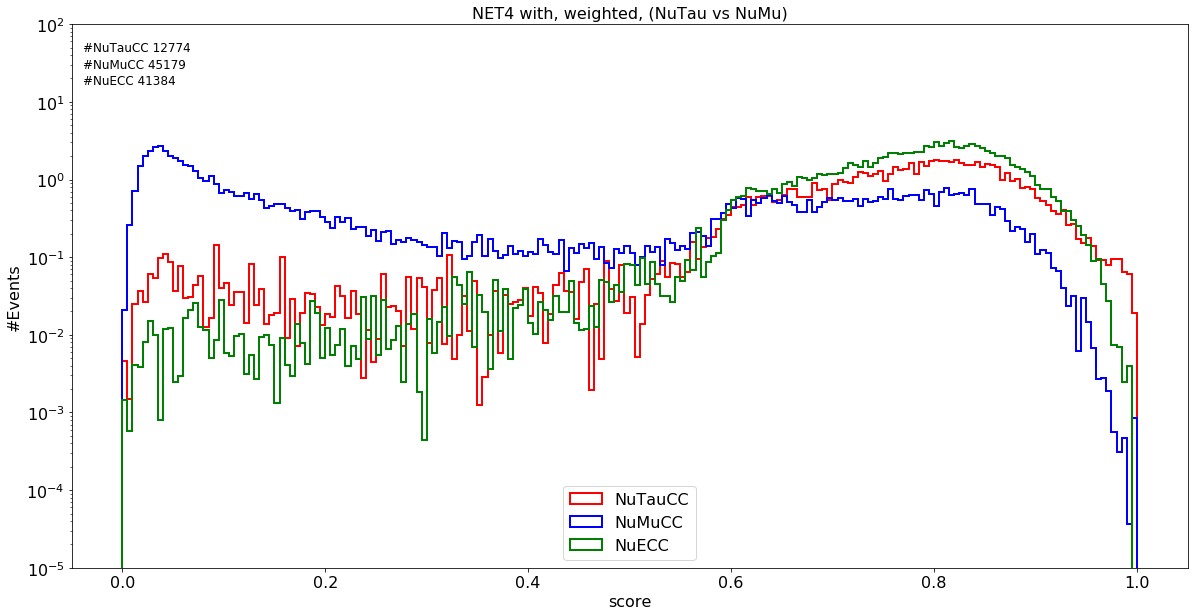

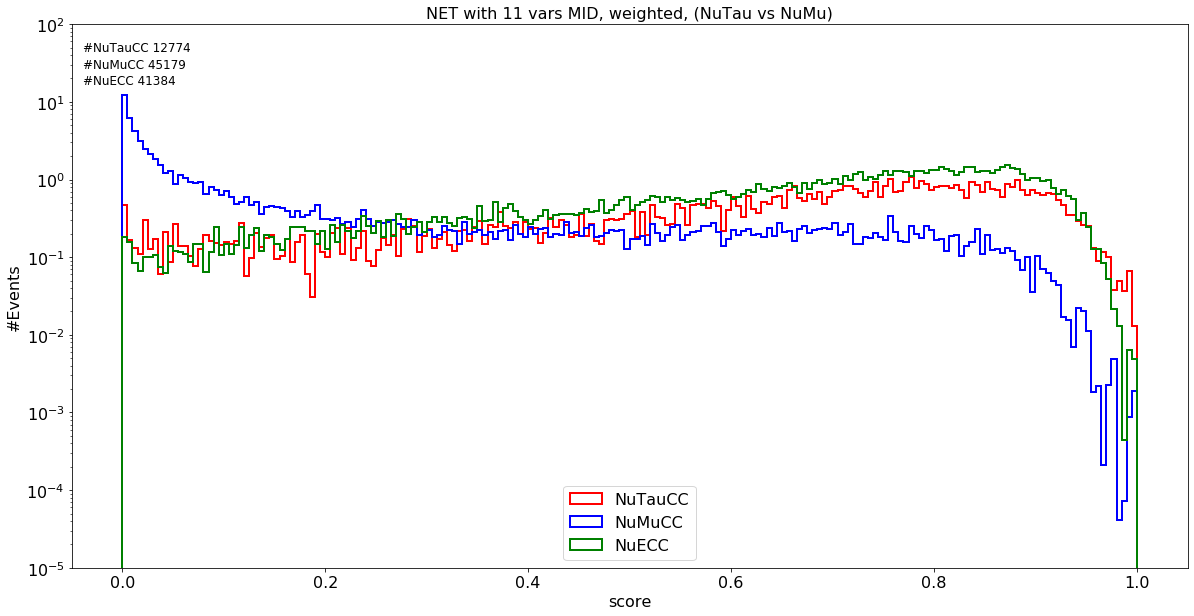

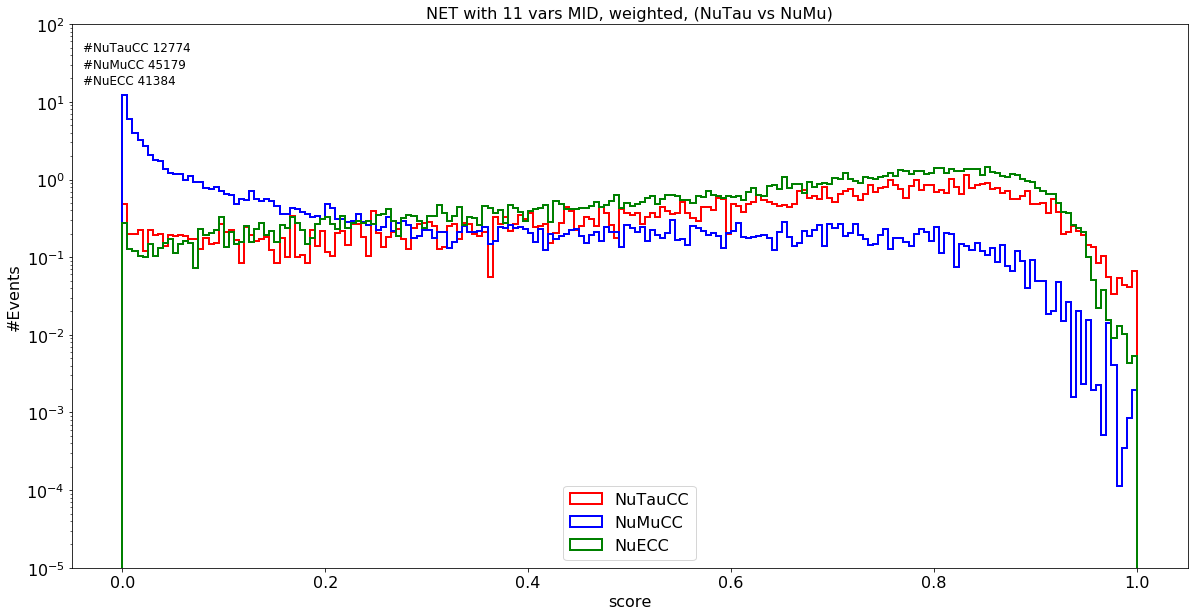

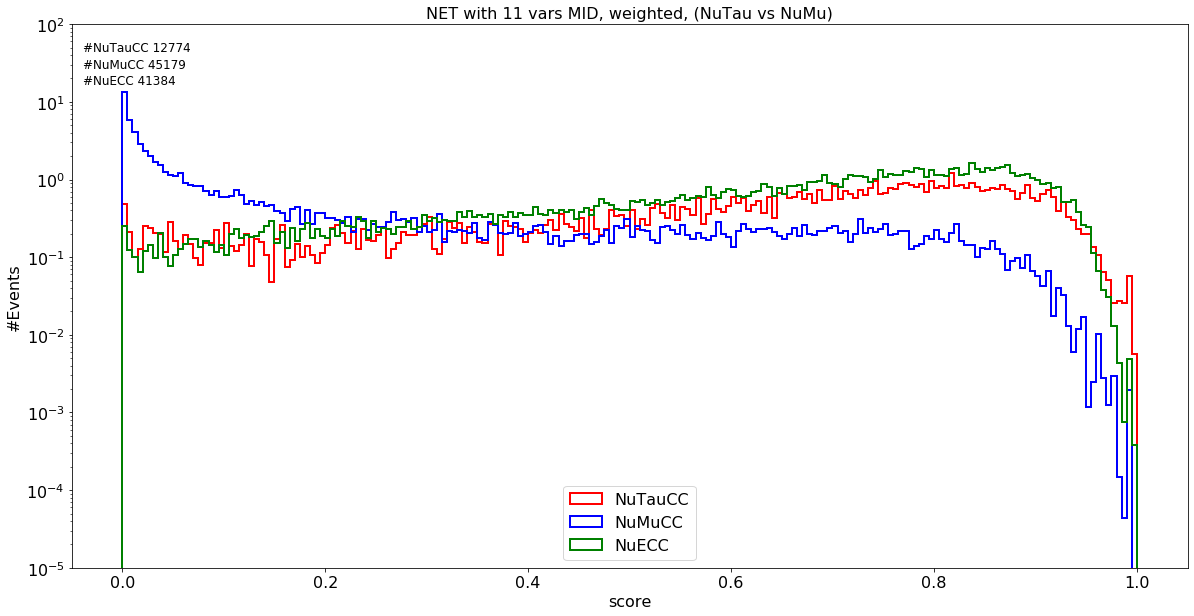

In [6]:
PlotWO("NET4 with, weighted, (NuTau vs NuMu)", "score", data_t11m['preds']['n4'],data_m11m['preds']['n4'],data_e11m['preds']['n4'],\
      data_t11m['weight_val'],data_m11m['weight_val'],data_e11m['weight_val'])
PlotWO("NET with 11 vars MID, weighted, (NuTau vs NuMu)", "score", data_t11m['preds']['n5'],data_m11m['preds']['n5'],data_e11m['preds']['n5'],\
      data_t11m['weight_val'],data_m11m['weight_val'],data_e11m['weight_val'])
PlotWO("NET with 11 vars MID, weighted, (NuTau vs NuMu)", "score", data_t11m['preds']['n6'],data_m11m['preds']['n6'],data_e11m['preds']['n6'],\
      data_t11m['weight_val'],data_m11m['weight_val'],data_e11m['weight_val'])
PlotWO("NET with 11 vars MID, weighted, (NuTau vs NuMu)", "score", data_t11m['preds']['n7'],data_m11m['preds']['n7'],data_e11m['preds']['n7'],\
      data_t11m['weight_val'],data_m11m['weight_val'],data_e11m['weight_val'])

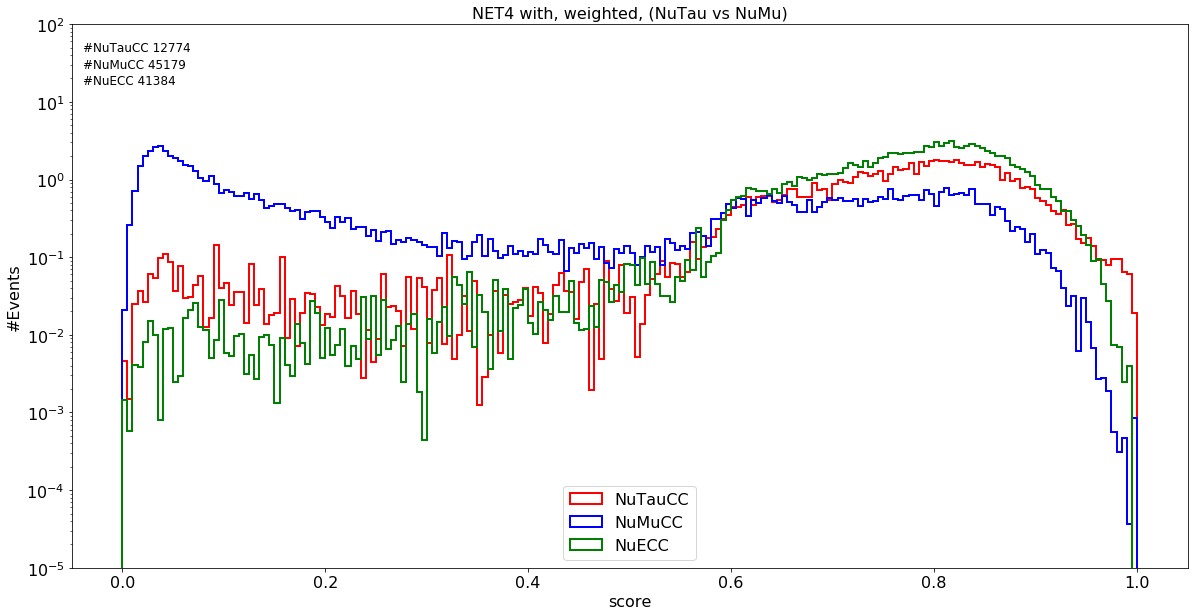

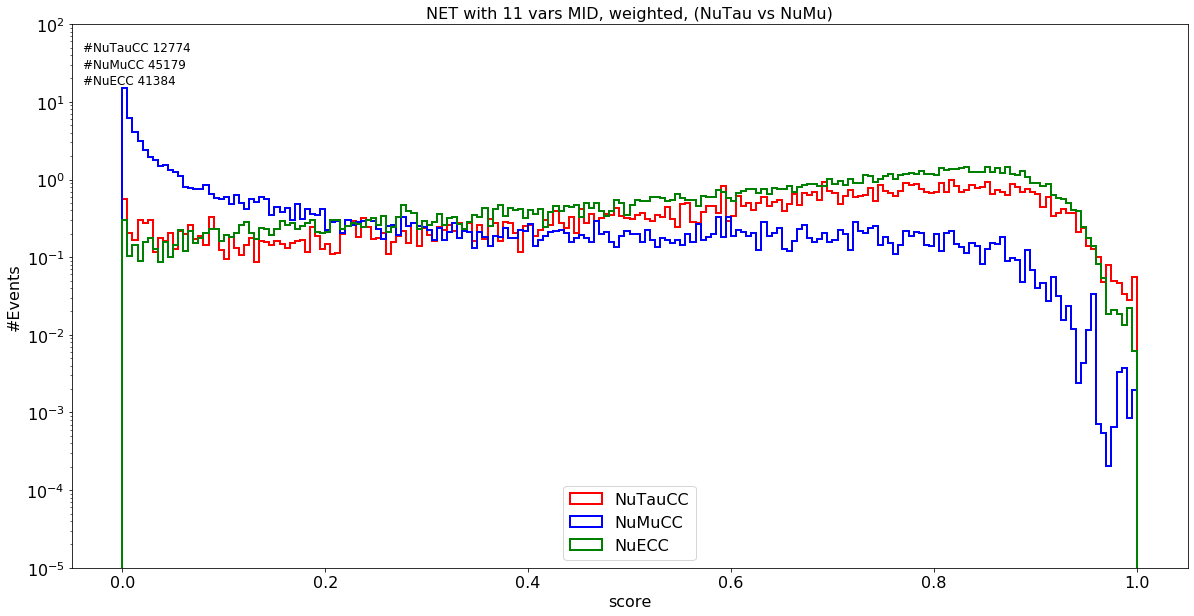

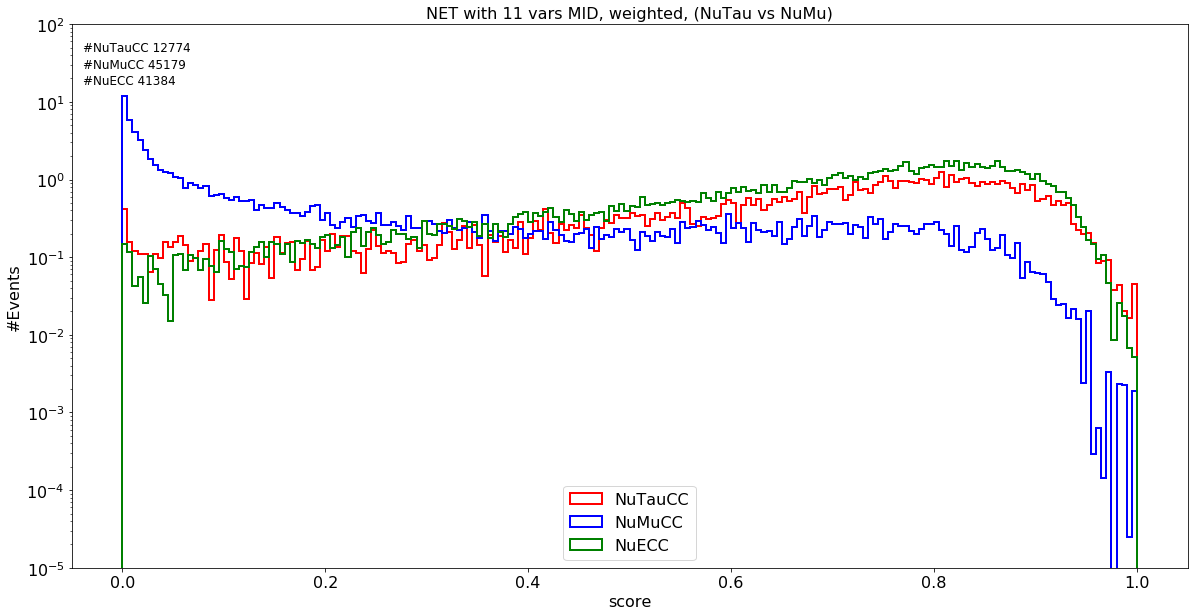

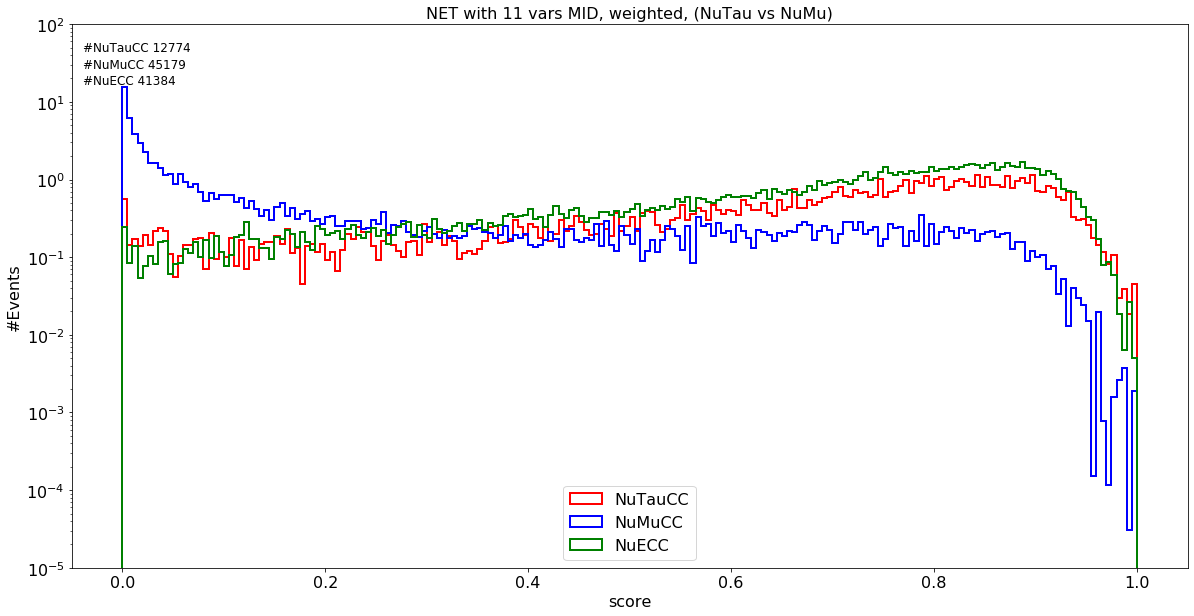

In [7]:
PlotWO("NET4 with, weighted, (NuTau vs NuMu)", "score", data_t11['preds']['n4'],data_m11['preds']['n4'],data_e11['preds']['n4'],\
      data_t11['weight_val'],data_m11['weight_val'],data_e11['weight_val'])
PlotWO("NET with 11 vars MID, weighted, (NuTau vs NuMu)", "score", data_t11['preds']['n5'],data_m11['preds']['n5'],data_e11['preds']['n5'],\
      data_t11['weight_val'],data_m11['weight_val'],data_e11['weight_val'])
PlotWO("NET with 11 vars MID, weighted, (NuTau vs NuMu)", "score", data_t11['preds']['n6'],data_m11['preds']['n6'],data_e11['preds']['n6'],\
      data_t11['weight_val'],data_m11['weight_val'],data_e11['weight_val'])
PlotWO("NET with 11 vars MID, weighted, (NuTau vs NuMu)", "score", data_t11['preds']['n7'],data_m11['preds']['n7'],data_e11['preds']['n7'],\
      data_t11['weight_val'],data_m11['weight_val'],data_e11['weight_val'])

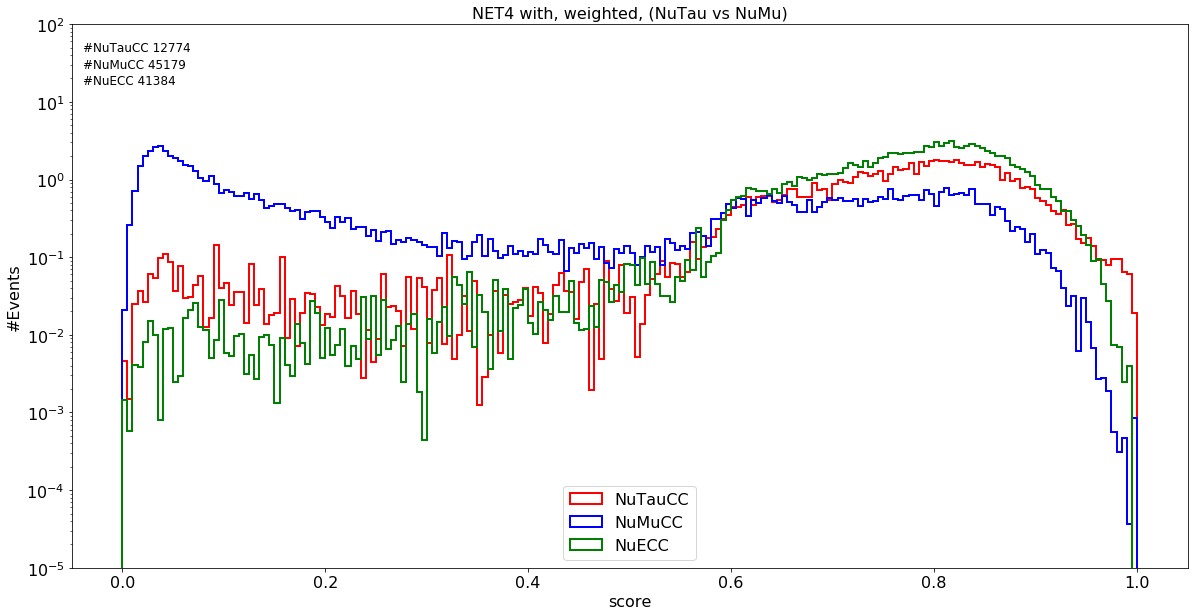

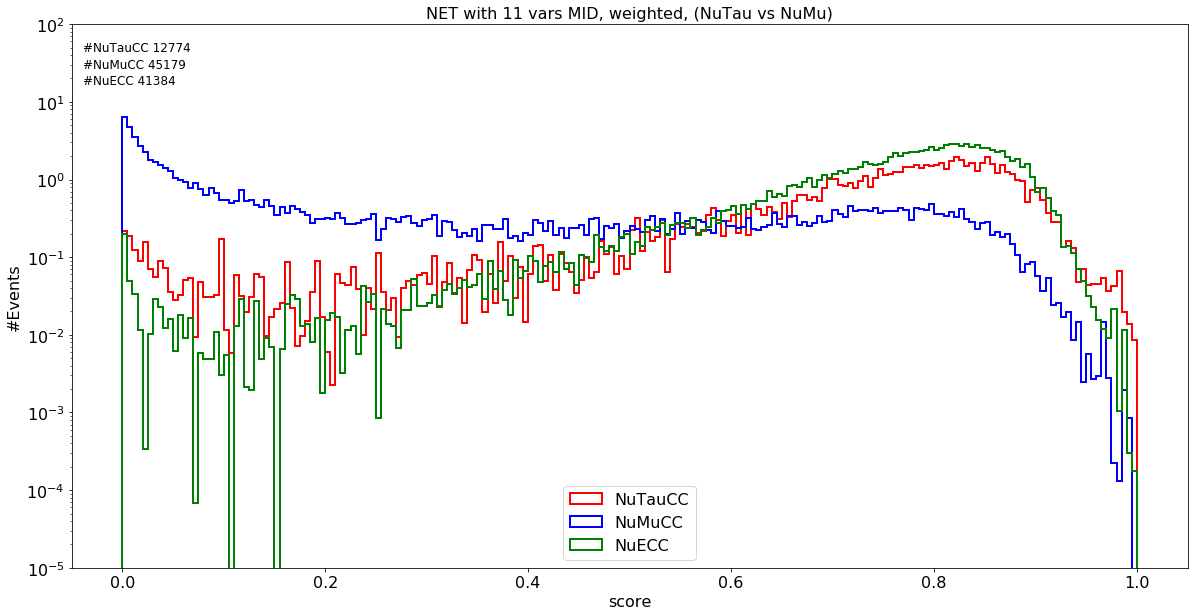

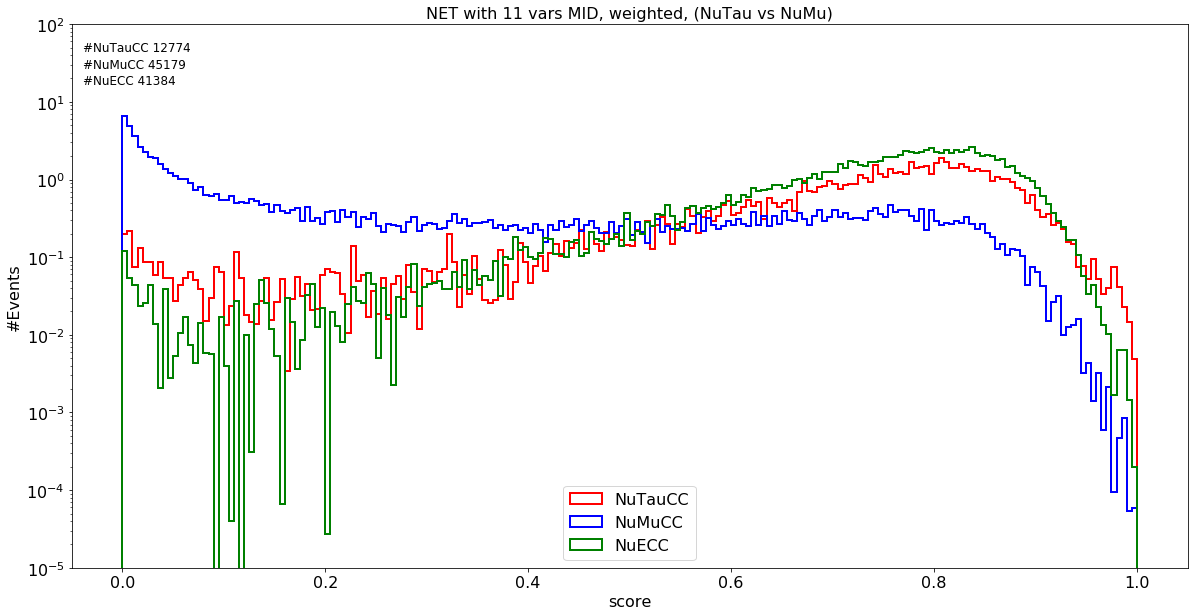

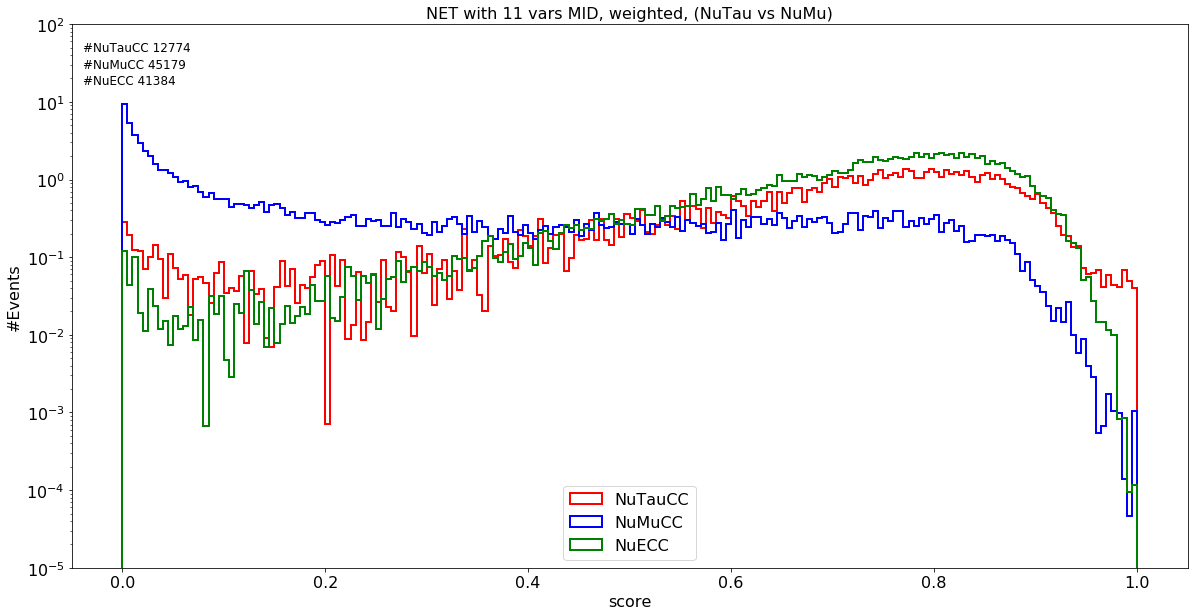

In [8]:
PlotWO("NET4 with, weighted, (NuTau vs NuMu)", "score", data_t6['preds']['n4'],data_m6['preds']['n4'],data_e6['preds']['n4'],\
      data_t6['weight_val'],data_m6['weight_val'],data_e6['weight_val'])
PlotWO("NET with 11 vars MID, weighted, (NuTau vs NuMu)", "score", data_t6['preds']['n5'],data_m6['preds']['n5'],data_e6['preds']['n5'],\
      data_t6['weight_val'],data_m6['weight_val'],data_e6['weight_val'])
PlotWO("NET with 11 vars MID, weighted, (NuTau vs NuMu)", "score", data_t6['preds']['n6'],data_m6['preds']['n6'],data_e6['preds']['n6'],\
      data_t6['weight_val'],data_m6['weight_val'],data_e6['weight_val'])
PlotWO("NET with 11 vars MID, weighted, (NuTau vs NuMu)", "score", data_t6['preds']['n7'],data_m6['preds']['n7'],data_e6['preds']['n7'],\
      data_t6['weight_val'],data_m6['weight_val'],data_e6['weight_val'])